In [ ]:
import numpy as np
import pandas as pd
import time
import warnings
from sklearn import metrics, preprocessing, tree
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

In [ ]:
datos = pd.read_excel("DatosLimpios_2Y.xlsx", names=['Animado', 'Confiable', 'Extravertido', 'Responsable', 'Serio','estilo'])
datos

,Animado,Confiable,Extravertido,Responsable,Serio,estilo
5,1,0,0,0,0,1
6,0,0,0,1,0,1
11,0,0,0,0,1,1
12,0,0,0,0,1,1
13,1,0,0,0,0,1
...,...,...,...,...,...,...
2197,0,0,0,1,0,0
2200,0,1,0,0,0,0
2201,1,0,0,0,0,1
2204,1,0,0,0,0,1


In [ ]:
datos.shape

(749, 6)

In [ ]:
datos = datos.values
X = datos[:, :-1]
y = datos[:,-1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 101)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100, 
                           criterion="gini", 
                           max_depth=33, 
                           random_state = 45, 
                           verbose=1)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6888888888888889


In [ ]:
a = cross_val_score(clf, X_train, y_train, cv = 5, scoring="accuracy")
print("Accuracy: {0: .2f}".format(a.mean()))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

Accuracy:  0.71


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


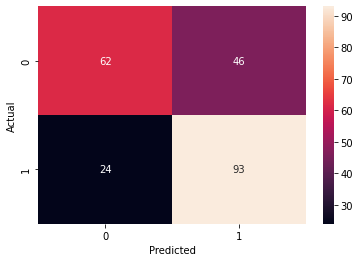

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [ ]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.6888888888888889
Precision: 0.6690647482014388
Recall: 0.7948717948717948


In [ ]:

X_new = pd.DataFrame({ 'Animado': [0], 'Confiable': [0], 'Extravertido': [0], 'Responsable': [0], 'Serio': [1]})
print("El array 1 corresponde al estilo casual y el 0 corresponde al estilo modesto\n")
print("El estilo de vestir es:", clf.predict(X_new))

El array 1 corresponde al estilo casual y el 0 corresponde al estilo modesto

El estilo de vestir es: [1]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
